# B. Deepak Kumar

# BL.EN.U4AIE21028

# AIE- D (SEM-5)

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

# A1) Find the first derivative of your speech signal with finite difference method. Listen to the first derivative signal and the original speech signal


In [1]:
import librosa.display
import IPython.display as ipd
from glob import glob
import numpy as np
import librosa
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

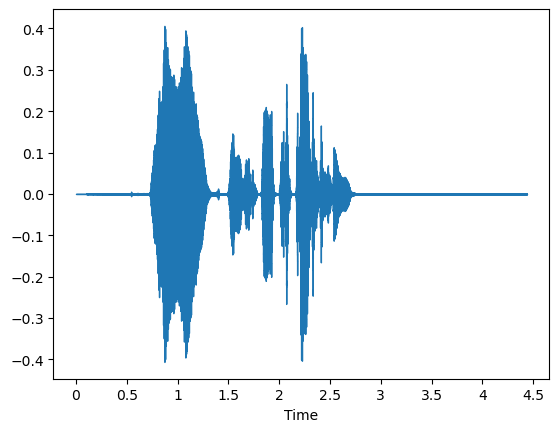

In [4]:
y, sr = librosa.load('AISPS.wav')
librosa.display.waveshow(y)


In [7]:
derivative_1 = np.diff(y)
derivative_1 /= np.max(np.abs(derivative_1))
print(derivative_1)

[ 0.          0.          0.         ... -0.00041033 -0.00013201
 -0.00017219]


In [8]:
print("Playing Original Signal:")
ipd.Audio(y, rate=sr)

Playing Original Signal:


In [9]:
print("Playing First Derivative Signal:")
ipd.Audio(derivative_1, rate=sr)

Playing First Derivative Signal:


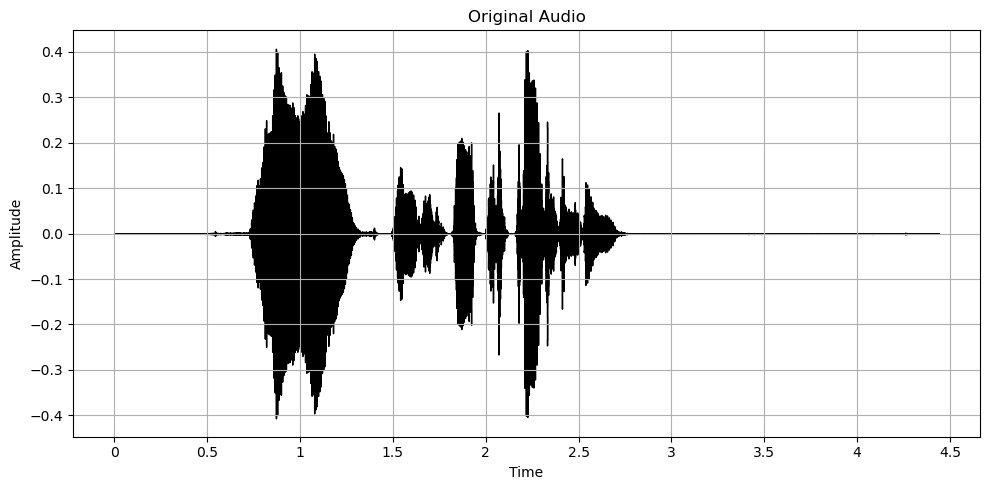

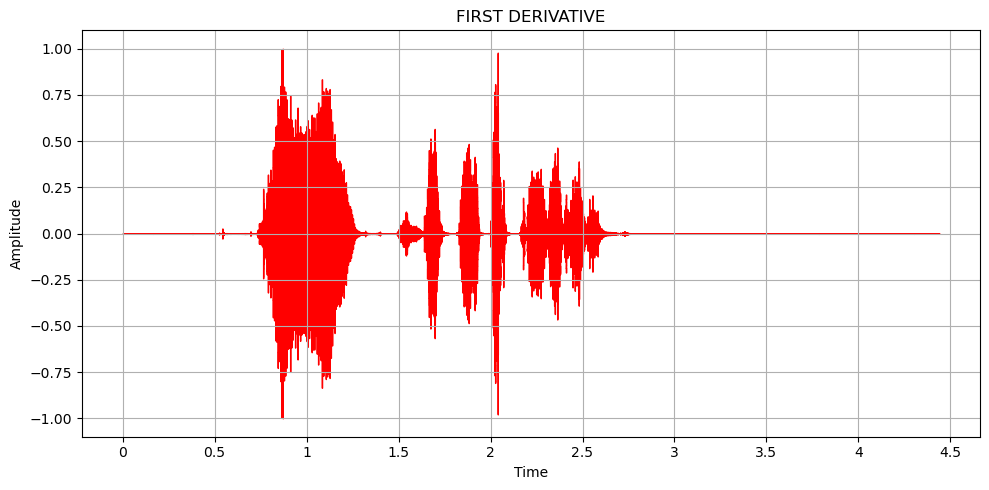

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(y, sr=sr,color='black')
plt.title('Original Audio')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
librosa.display.waveshow(derivative_1, sr=sr,color='red')
plt.title('FIRST DERIVATIVE')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

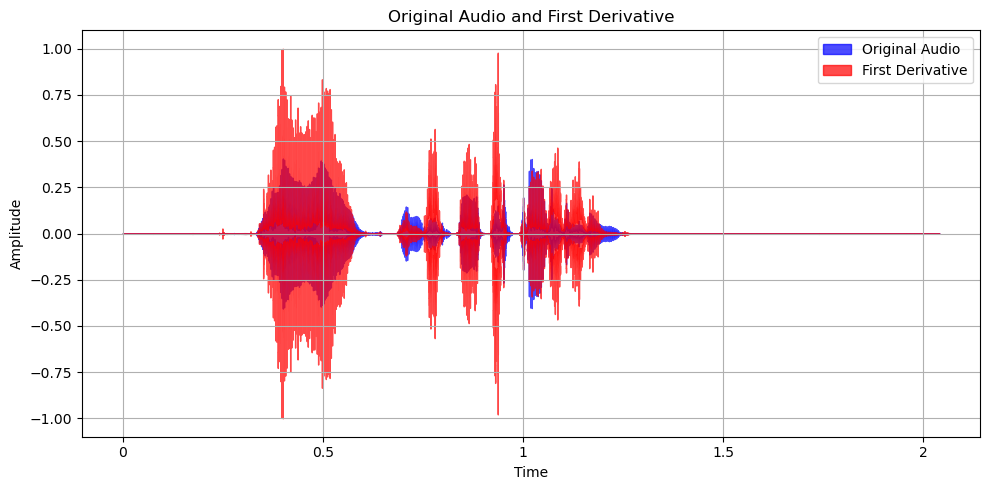

In [37]:
plt.figure(figsize=(10, 5))

# Plot the original audio in black
librosa.display.waveshow(y, sr=sr, color='blue', alpha=0.7, label='Original Audio')

# Plot the first derivative in red
librosa.display.waveshow(derivative_1, sr=sr, color='red', alpha=0.7, label='First Derivative')

plt.title('Original Audio and First Derivative')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# A2. Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

In [18]:
zero_crossing = np.where(np.diff(np.sign(derivative_1)))[0]
diff = np.diff(zero_crossing)
threshold = 1000
speech_regions = diff[diff > threshold]
silence_regions = diff[diff <= threshold]
print("Zero_crossing values/n",zero_crossing)
print(speech_regions)
print(silence_regions)

Zero_crossing values/n [ 2206  2207  2209 ... 97893 97896 97897]
[]
[1 2 1 ... 1 3 1]


In [19]:
avg_length_speech = np.mean(speech_regions)
avg_length_silence = np.mean(silence_regions)

print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)
print("Average length between consecutive zero crossings in silence regions:", avg_length_silence)

Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 2.1760318362706084


C:\Users\saide\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\saide\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C:\Users\saide\AppData\Local\Temp\ipykernel_24688\1241865498.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions', color='black')
C:\Users\saide\AppData\Local\Temp\ipykernel_24688\1241865498.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo',


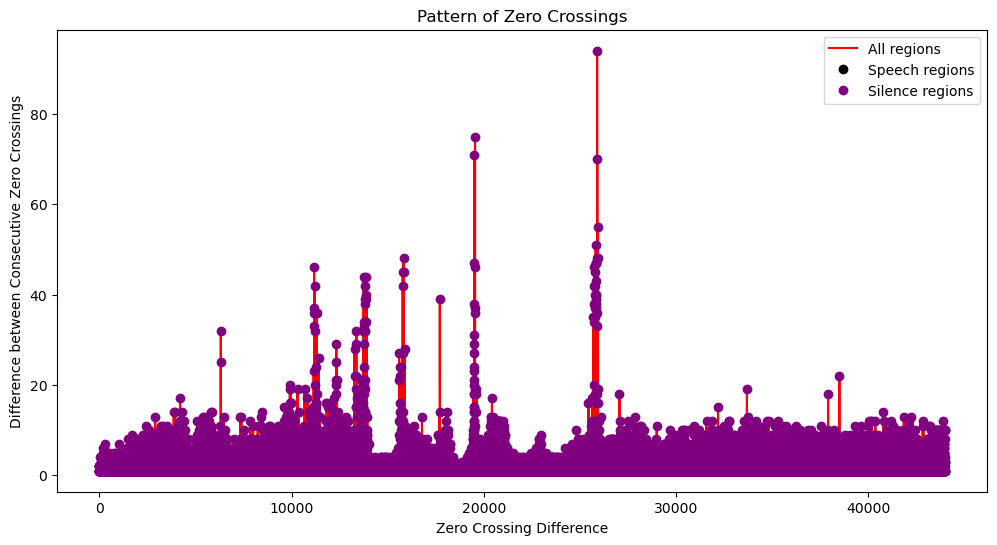

Pattern of Zero Crossings:
All regions: [1 2 1 ... 1 3 1]
Speech regions: []
Silence regions: [1 2 1 ... 1 3 1]


In [25]:
plt.figure(figsize=(12, 6))
plt.plot(diff, label='All regions', color='red')
plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions', color='black')
plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo',
         label='Silence regions', color='purple')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Zero Crossing Difference')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

print("Pattern of Zero Crossings:")
print("All regions:", diff)
print("Speech regions:", speech_regions)
print("Silence regions:", silence_regions)

# A3. Speak 5 of your favoritewords. Observe the length of the speech signals. Compare the lengths of your spoken words with those of your project team-mate.

In [29]:
word_files_mine = ['AppleD.wav','AmazonD.wav','GoogleD.wav','MicrosoftD.wav','Oracle.wav']
word_files_team_mate = ['apple.wav', 'amazon.wav', 'google.wav', 'microsoft.wav', 'oracle (1).wav']
words = ['Apple', 'Amazon', 'Google', 'Microsoft', 'Oracle']
word_lengths_mine = []
word_lengths_teammate = []


In [30]:
for word_file in word_files_mine:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_mine.append(length_seconds)

for word_file in word_files_team_mate:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_teammate.append(length_seconds)

print("Lengths of the spoken words MINE:", word_lengths_mine)
print("Lengths of the spoken words TeamMate:", word_lengths_teammate)

Lengths of the spoken words MINE: [1.8578125, 1.3778125, 1.4378125, 2.2578125, 2.3778125]
Lengths of the spoken words TeamMate: [1.3013333333333332, 1.3866666666666667, 1.4293333333333333, 1.2586666666666666, 1.664]


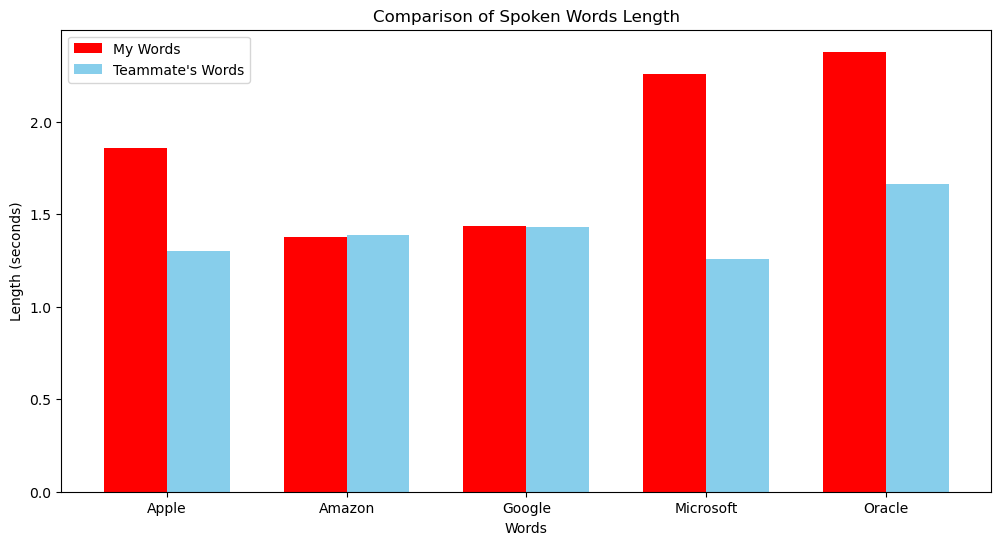

In [31]:
bar_width = 0.35
index = np.arange(len(words))
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, word_lengths_mine, bar_width, label='My Words', color='red')
plt.bar(index + bar_width/2, word_lengths_teammate, bar_width, label="Teammate's Words", color='skyblue')
plt.xlabel('Words')
plt.ylabel('Length (seconds)')
plt.title('Comparison of Spoken Words Length')
plt.xticks(index, words)
plt.legend()

plt.show()


# A4. Select a sentence which can be used for making a statement or asking a question. Ex: “You are going to college on Sunday(./?)”. Record two signals –one with making the statement while other with asking question. Study the two signals and compare them.

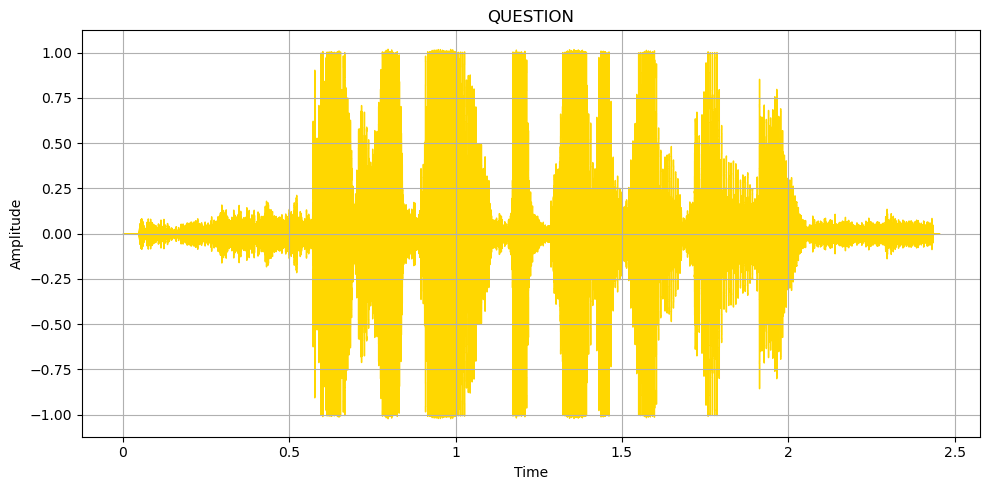

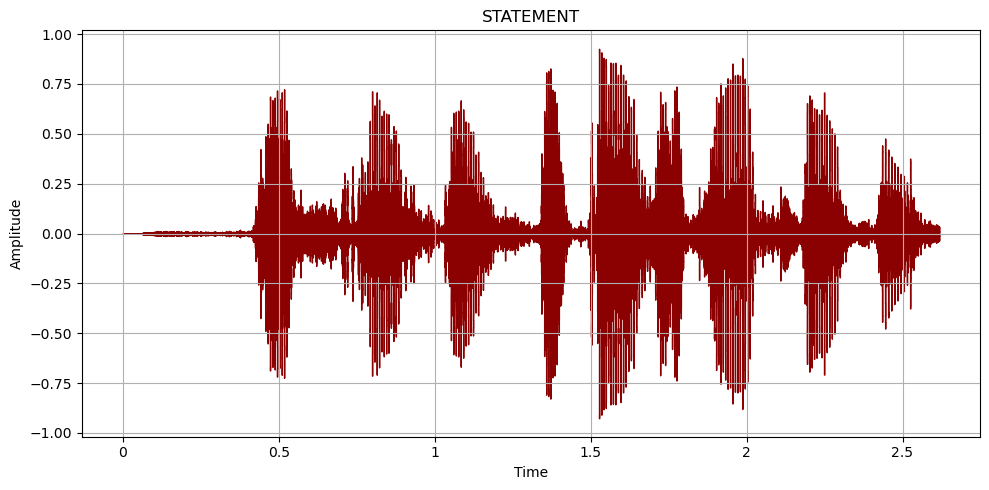

In [46]:
statement, sr1 = librosa.load('answer.wav')
question, sr2 = librosa.load('question.wav')

question, sr = librosa.load('question.wav')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(question, sr=sr,color='gold')
plt.title('QUESTION')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=sr,color='darkred')
plt.title('STATEMENT')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()



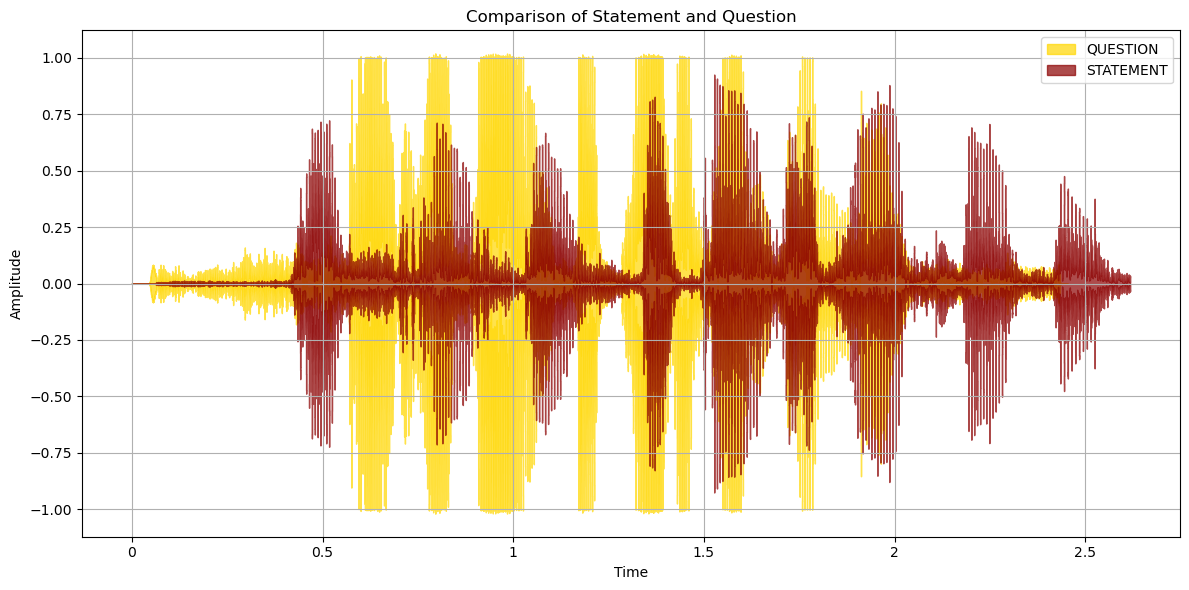

In [47]:
# Visualize both signals on the same graph
plt.figure(figsize=(12, 6))

# Plot question in gold
librosa.display.waveshow(question, sr=sr, color='gold', alpha=0.7, label='QUESTION')

# Plot statement in dark red
librosa.display.waveshow(statement, sr=sr, color='darkred', alpha=0.7, label='STATEMENT')

plt.title('Comparison of Statement and Question')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
print("Playing Question:")
ipd.Audio(question, rate=sr)


Playing Question:


In [49]:
print("Playing Statement:")
ipd.Audio(statement, rate=sr)

Playing Statement:
